In [19]:
!pip install textblob
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("event-feedback.csv (1).xlsx")
df.head()

Saving event-feedback.csv.xlsx to event-feedback.csv (4).xlsx


,student name,feedback
0,raj,The event was amazing and very well managed.
1,rahul,It was boring and not engaging at all.
2,rohan,Speakers were great but the session was long.
3,raju,I loved the energy and activities!
4,golu,It could have been more interactive.


In [21]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['feedback'].apply(get_sentiment)
df.head()

,student name,feedback,Sentiment
0,raj,The event was amazing and very well managed.,Positive
1,rahul,It was boring and not engaging at all.,Negative
2,rohan,Speakers were great but the session was long.,Positive
3,raju,I loved the energy and activities!,Positive
4,golu,It could have been more interactive.,Positive


/tmp/ipython-input-22-2788525054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


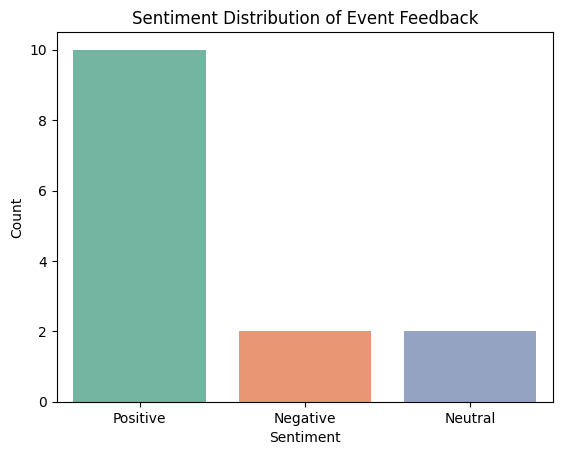

In [22]:
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution of Event Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

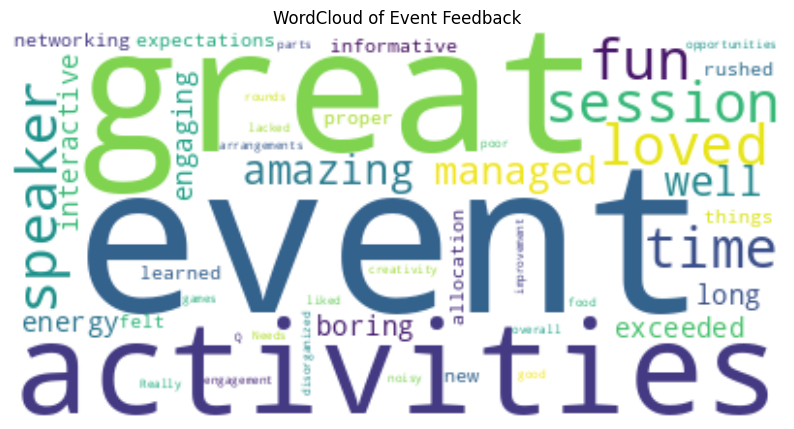

In [23]:
!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(feedback for feedback in df.feedback)
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Event Feedback")
plt.show()

In [24]:
df.to_csv("event_feedback_with_sentiment.csv", index=False)
files.download("event_feedback_with_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>